In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math

## Part a

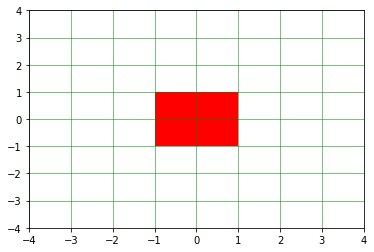

In [74]:
poly = np.array(
    [
        [-1, -1, 1],
        [-1, 1, 1],
        [1,1, 1],
        [1, -1, 1]
    ]
)

fig,ax = plt.subplots(1)
shape = patches.Polygon(poly[:,:2],linewidth=1,facecolor='r')
ax.add_patch(shape)
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.axis([-4, 4, -4, 4])
plt.show()


## Part b

### Rigid-body

In [13]:
def plot(inp, axis = [-4, 4, -4, 4]):
    fig,ax = plt.subplots(1)
    shape = patches.Polygon(inp,linewidth=1,facecolor='r')
    ax.add_patch(shape)
    plt.grid(color='g', linestyle='-', linewidth=0.5)
    plt.axis(axis)
    plt.show()

In [77]:
r = input("Please enter the rotation alpha in degree : ")
t1, t2 = input("please enter x and y translation, separated with space : ").split()

r = int(r)
t1 = int(t1)
t2 = int(t2)

Please enter the rotation alpha in degree : 45
please enter x and y translation, separated with space : 1 1


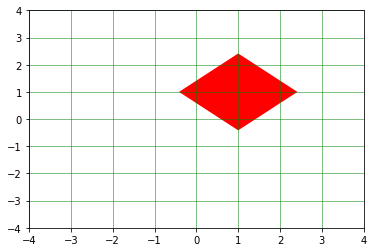

In [78]:
rigid_matrix = np.array(
    [
        [math.cos(math.radians(r)), -1 * math.sin(math.radians(r)), t1],
        [math.sin(math.radians(r)), math.cos(math.radians(r)), t2],
        [0,0,1]
    ])


poly_rigid = np.transpose(
    np.matmul(rigid_matrix, np.transpose(poly))
)

plot(poly_rigid[:, :2])

In [79]:
poly_rigid

array([[ 1.        , -0.41421356,  1.        ],
       [-0.41421356,  1.        ,  1.        ],
       [ 1.        ,  2.41421356,  1.        ],
       [ 2.41421356,  1.        ,  1.        ]])

### Similarity

In [6]:
r = input("Please enter the rotation alpha in degree : ")
t1, t2 = input("please enter x and y translation, separated with space : ").split()
s = input("please enter similarity scale : ")

r = int(r)
t1 = int(t1)
t2 = int(t2)
s = int(s)

Please enter the rotation alpha in degree : 45
please enter x and y translation, separated with space : 0 0
please enter similarity scale : 2


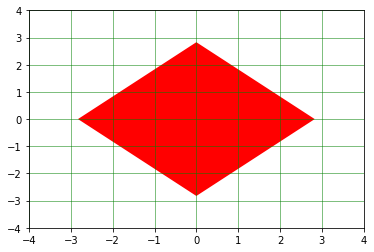

In [10]:
similarity_matrix = np.array(
    [
        [s * math.cos(math.radians(r)), -s * math.sin(math.radians(r)), t1],
        [s * math.sin(math.radians(r)), s * math.cos(math.radians(r)), t2],
        [0,0,1]
    ])


poly_similarity = np.transpose(
    np.matmul(similarity_matrix, np.transpose(poly))
)

plot(poly_similarity[:,:2])

In [115]:
poly_similarity

array([[-2.22044605e-16, -2.82842712e+00,  1.00000000e+00],
       [-2.82842712e+00,  2.22044605e-16,  1.00000000e+00],
       [ 2.22044605e-16,  2.82842712e+00,  1.00000000e+00],
       [ 2.82842712e+00, -2.22044605e-16,  1.00000000e+00]])

### affine

In [29]:
r1, r2, r3, r4, r5, r6 = input("Please enter r1 through r6, separeted with space : ").split()

r1 = int(r1)
r2 = int(r2)
r3 = int(r3)
r4 = int(r4)
r5 = int(r5)
r6 = int(r6)

Please enter r1 through r6, separeted with space : 1 2 0 2 1 0


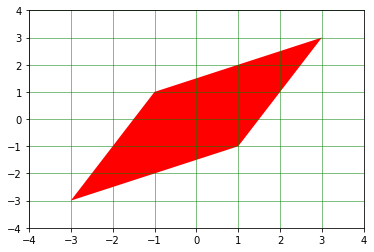

In [30]:
affine_matrix = np.array(
    [
        [r1, r2, r3],
        [r4, r5, r6],
        [0,0,1]
    ])


poly_affine = np.transpose(
    np.matmul(affine_matrix, np.transpose(poly))
)

plot(poly_affine[:,:2])

In [144]:
poly_affine

array([[-3, -3,  1],
       [ 1, -1,  1],
       [ 3,  3,  1],
       [-1,  1,  1]])

### projective

In [61]:
r1, r2, r3, r4, r5, r6, r7, r8 = input("Please enter r1 through r8, separeted with space : ").split()

r1 = int(r1)
r2 = int(r2)
r3 = int(r3)
r4 = int(r4)
r5 = int(r5)
r6 = int(r6)
r7 = int(r7)
r8 = int(r8)

Please enter r1 through r8, separeted with space : 5 6 3 -2 -8 -6 1 3


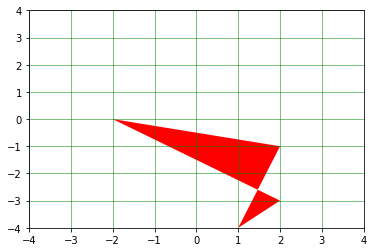

In [62]:
projective_matrix = np.array(
    [
        [r1, r2, r3],
        [r4, r5, r6],
        [r7,r8,1]
    ])


poly_projective = np.transpose(
    np.matmul(projective_matrix, np.transpose(poly))
)

for i in range(poly_projective.shape[0]):
    poly_projective[i] = poly_projective[i] / poly_projective[i, 2]

plot(poly_projective[:,:2])

In [147]:
poly_projective

array([[ 2,  1,  1],
       [ 1,  0,  1],
       [ 2,  2,  1],
       [-2, -7,  1]])

## Part C

Compute least square equation. If it has an answere, the transformation is not prespective. If the answere has a valid R and T, its a rigid body motion else, it is an affine transformation

In [53]:
def check_preserve(X1, X2):
    a_matrix = X1
    b_matrix = X2
    
    at_a = np.matmul(
        np.transpose(a_matrix), a_matrix
    )
        
    transform_matrix = []
    for i in range(2):
        solution = np.matmul(
            np.matmul(
                np.linalg.inv(at_a), np.transpose(a_matrix)
            ),
            b_matrix[:, i]
        )
        transform_matrix.append(np.transpose(solution))

    transform_matrix = np.array(transform_matrix)  
    
    pp = np.transpose(
        np.matmul(transform_matrix, np.transpose(a_matrix))
    ) - b_matrix
    if((pp < 1e-4).all() and (pp > -1 * 1e-4).all()):
        print("parallelism attributes preserved")

    tmp = np.matmul(np.transpose(transform_matrix[:2,:2]), transform_matrix[:2,:2])
    tmp = tmp / tmp[0,0]
    if((tmp - np.eye(2) < 1e-4).all()):
        print("angels preserved")

    det = transform_matrix[0,0] * transform_matrix[1, 1] - transform_matrix[0, 1] * transform_matrix[1, 0]
    if(det > 1 - 1e-4 and det < 1 + 1e-4):
        print("length preserved")
        
    return transform_matrix

#### check rigid body motion sample

In [63]:
a_matrix = np.array([
    [-1, -1, 1],
    [-1, 1, 1],
    [1, 1, 1],
    [1, -1, 1],
])

b_matrix = np.array([
    [1.        , -0.41421356 ],
    [-0.41421356,  1.        ],
    [1.        ,  2.41421356 ],
    [2.41421356,   1.        ],
])

tr = check_preserve(a_matrix, b_matrix)

parallelism attributes preserved
angels preserved
length preserved


#### check similarity sample

In [64]:
a_matrix = np.array([
    [-1, -1, 1],
    [-1, 1, 1],
    [1, 1, 1],
    [1, -1, 1],
])

b_matrix = np.array([
    [-2.22044605e-16, -2.82842712e+00],
    [-2.82842712e+00,  2.22044605e-16],
    [ 2.22044605e-16,  2.82842712e+00],
    [ 2.82842712e+00, -2.22044605e-16]
])

tr = check_preserve(a_matrix, b_matrix)

parallelism attributes preserved
angels preserved


#### check affine sample

In [65]:
a_matrix = np.array([
    [-1, -1, 1],
    [-1, 1, 1],
    [1, 1, 1],
    [1, -1, 1],
])

b_matrix = np.array([
    [-3, -3],
    [ 1, -1],
    [ 3,  3],
    [-1,  1]
])

tr = check_preserve(a_matrix, b_matrix)

parallelism attributes preserved


#### check prespective sample

In [66]:
a_matrix = np.array([
    [-1, -1, 1],
    [-1, 1, 1],
    [1, 1, 1],
    [1, -1, 1],
])

b_matrix = np.array([
    [ 2,  1],
    [ 1,  0],
    [ 2,  2],
    [-2, -7]
])

tr = check_preserve(a_matrix, b_matrix)

## Part D

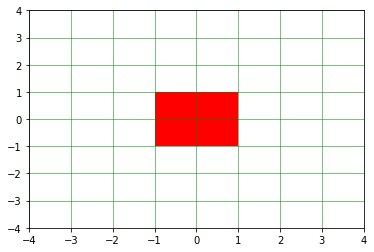

In [68]:
poly = np.array(
    [
        [-1, -1, 1],
        [-1, 1, 1],
        [1,1, 1],
        [1, -1, 1]
    ]
)

# plot the square
plot(poly[:, :2])

In [72]:
theta1 = 20
theta2 = 35
t11 = 1
t12 = 2
t21 = -1
t22 = -3
rigid1 = np.array(
    [
        [math.cos(math.radians(theta1)), -1 * math.sin(math.radians(theta1)), t11],
        [math.sin(math.radians(theta1)), math.cos(math.radians(theta1)), t12],
        [0,0,1]
    ])

rigid2 = np.array(
    [
        [math.cos(math.radians(theta2)), -1 * math.sin(math.radians(theta2)), t21],
        [math.sin(math.radians(theta2)), math.cos(math.radians(theta2)), t22],
        [0,0,1]
    ])

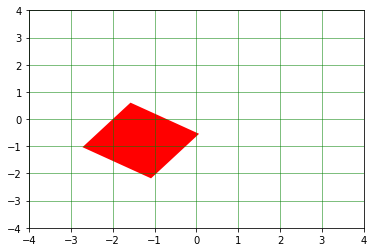

In [73]:
# first move by rigid1 then by rigid2
poly_rigid = np.transpose(
    np.matmul(
        rigid2, np.transpose(
            np.transpose(
                np.matmul(rigid1, np.transpose(poly))
            )
        )
    )
)

plot(poly_rigid[:, :2])


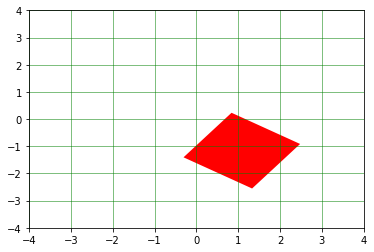

In [74]:
# first move by rigid2 then by rigid1
poly_rigid = np.transpose(
    np.matmul(
        rigid1, np.transpose(
            np.transpose(
                np.matmul(rigid2, np.transpose(poly))
            )
        )
    )
)

plot(poly_rigid[:, :2])


The result are not identical, but the oriantation is the same
this property hold in the 3D space too because ::

In [75]:
print(np.matmul(rigid1, rigid2))

[[ 0.57357644 -0.81915204  1.08636781]
 [ 0.81915204  0.57357644 -1.16109801]
 [ 0.          0.          1.        ]]


In [76]:
print(np.matmul(rigid2, rigid1))

[[ 0.57357644 -0.81915204 -1.32800083]
 [ 0.81915204  0.57357644 -0.78811948]
 [ 0.          0.          1.        ]]


The only difference between R2 * R1 and R1 * R2 is in the 3rd column, which is the translation column. This indicates that we can transform from one to another with only a translation